Inverse design classification based on R and T calculation from forward RCWA simulation for one layer system SiO2\TiO2 ( layer 80nm thickness).
For substrate I've added dielectric constant of quartz 3.76 into TRCWA TRCWA_BOTTOM_LAYER_EPS


**1.**

In [1]:
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../")

import nidn
nidn.set_log_level("INFO")

11:21:02|NIDN-INFO| Initialized NIDN for cpu
11:21:02|NIDN-INFO| Using double precision
11:21:02|NIDN-INFO| Switching log level to warning.


In [11]:
import torch

In [2]:
from nidn import MaterialCollection

In [3]:
c = MaterialCollection((350,400))

In [4]:
print(c.epsilon_matrix)

tensor([[ 0.7524+3.3186e-01j,  0.7524+3.3186e-01j],
        [ 6.0667+1.4778e-04j,  6.0667+1.4778e-04j],
        [ 2.6526+1.5116e+01j,  2.6526+1.5116e+01j],
        [ 4.1185+8.1177e-05j,  4.1185+8.1177e-05j],
        [-0.8757+4.0293e+00j, -0.8757+4.0293e+00j],
        [-5.5660+5.5753e+00j, -5.5660+5.5753e+00j],
        [-8.2060+9.1085e+00j, -8.2060+9.1085e+00j],
        [ 2.0608+4.8904e+00j,  2.0608+4.8904e+00j],
        [ 3.3499-1.9042e-01j,  3.3499-1.9042e-01j],
        [ 2.0079+8.5020e-03j,  2.0079+8.5020e-03j]])


In [5]:
print(c.material_names)

['tantalum_pentoxide', 'silicon_nitride', 'germanium', 'aluminium_nitride', 'indium_arsenide', 'gallium_arsenide', 'aluminium_arsenide', 'titanium_oxide', 'aluminium_oxide', 'zinc_oxide']


In [6]:
print(c.materials_folder)

/home/t/miniconda3/lib/python3.10/site-packages/nidn/materials/data/


In [28]:
# Start with the default config
cfg = nidn.load_default_cfg()
cfg.use_gpu = True

In [29]:
# Print run config
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 1              |seed                   : 100            |
model_type             : siren          |iterations             : 3000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : -100.0         |real_max_eps           : 100.0          |imag_min_eps           : 0.0            |
imag_max_eps           : 3.0            |solver                 : TRCWA          |Nx                     : 1              |
Ny      

In [30]:
# Titanium Oxide Uniform on glass
# Set grid specifics
cfg.Nx = 1
cfg.Ny = 1
cfg.N_layers = 1
cfg.N_freq = 128
cfg.TRCWA_BOTTOM_LAYER_EPS = 3.76
cfg.TRCWA_L_grid = [[0.1,0.0],[0.0,0.1]]
cfg.TRCWA_NG = 11
cfg.PER_LAYER_THICKNESS = [0.08]
cfg.freq_distribution = "linear"

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 3e-7
cfg.physical_wavelength_range[1] = 1e-6

# Determine target frequencies (in TRCWA units)
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution
)

In [31]:
# Init eps_grid
eps_grid = torch.zeros(cfg.Nx,cfg.Ny,cfg.N_layers,cfg.N_freq,dtype=torch.cfloat)

layer_builder = nidn.LayerBuilder(cfg)

In [32]:
# Uniform Titanium nitride
eps_grid[:,:,0,:] = layer_builder.build_uniform_layer("titanium_oxide")


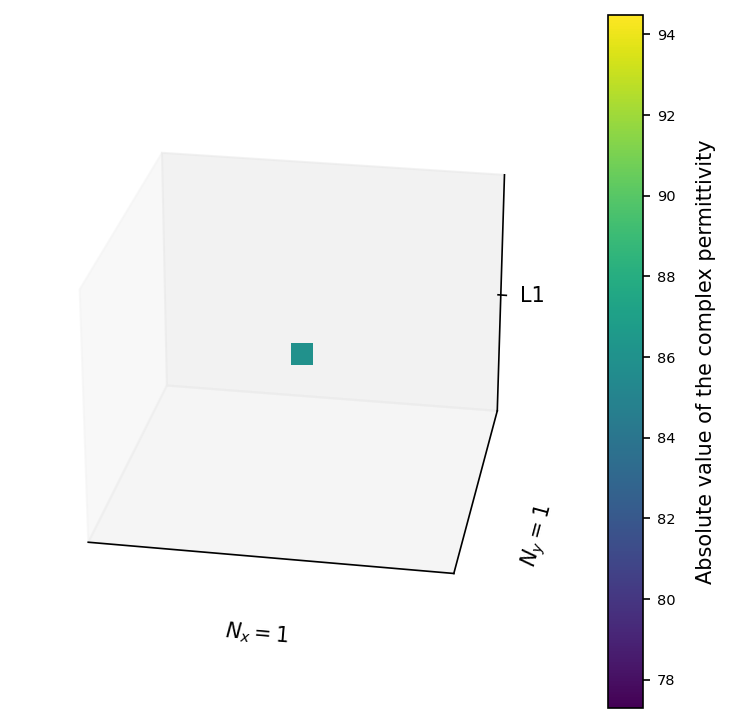

In [33]:
# Plot the abs values of the produced grid
nidn.plot_epsilon_grid(eps_grid,cfg)

In [34]:
# Print run config
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 1              |seed                   : 100            |
model_type             : siren          |iterations             : 3000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : -100.0         |real_max_eps           : 100.0          |imag_min_eps           : 0.0            |
imag_max_eps           : 3.0            |solver                 : TRCWA          |Nx                     : 1              |
Ny      

In [35]:
R = [0.35, 0.35, 0.36, 0.36, 0.37, 0.37, 0.37, 0.38, 0.38, 0.38, 0.39, 0.39, 0.38, 0.38, 0.37, 0.37, 0.36, 0.36, 0.35, 0.34, 0.34, 0.33, 0.32, 0.32, 0.31, 0.3, 0.29, 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.21, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.14, 0.13, 0.12, 0.12, 0.11, 0.11, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.2, 0.21, 0.23, 0.24, 0.26, 0.27, 0.29, 0.3, 0.32, 0.33, 0.35, 0.36, 0.38, 0.39, 0.4, 0.41, 0.43, 0.44, 0.44, 0.45, 0.46, 0.46, 0.47, 0.47, 0.47, 0.47, 0.46, 0.45, 0.44, 0.43, 0.41, 0.39, 0.37, 0.34, 0.32, 0.29, 0.27, 0.24, 0.23, 0.21, 0.21, 0.2, 0.21, 0.21, 0.22, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.31, 0.32, 0.32, 0.32, 0.32, 0.33, 0.33, 0.33, 0.33]
T = [0.65, 0.65, 0.65, 0.64, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.64, 0.64, 0.64, 0.65, 0.65, 0.66, 0.66, 0.67, 0.67, 0.68, 0.69, 0.69, 0.7, 0.71, 0.71, 0.72, 0.73, 0.73, 0.74, 0.75, 0.76, 0.77, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.82, 0.83, 0.84, 0.85, 0.85, 0.86, 0.86, 0.87, 0.87, 0.87, 0.87, 0.88, 0.88, 0.87, 0.87, 0.87, 0.86, 0.86, 0.85, 0.85, 0.84, 0.83, 0.82, 0.81, 0.79, 0.78, 0.77, 0.76, 0.74, 0.73, 0.72, 0.71, 0.69, 0.68, 0.67, 0.66, 0.64, 0.63, 0.62, 0.61, 0.6, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.54, 0.53, 0.52, 0.52, 0.52, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.49, 0.48, 0.47, 0.45, 0.43, 0.4, 0.37, 0.33, 0.3, 0.25, 0.22, 0.18, 0.15, 0.12, 0.1, 0.08, 0.06, 0.04, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
# import numpy as np

# def save_array_as_txt(array, filename):
#     np.savetxt(filename, array)








In [ ]:
# my_array = 1000*nidn.freq_to_wl(cfg.target_frequencies)
# save_array_as_txt(my_array, 'output.txt')#udji u NIDN

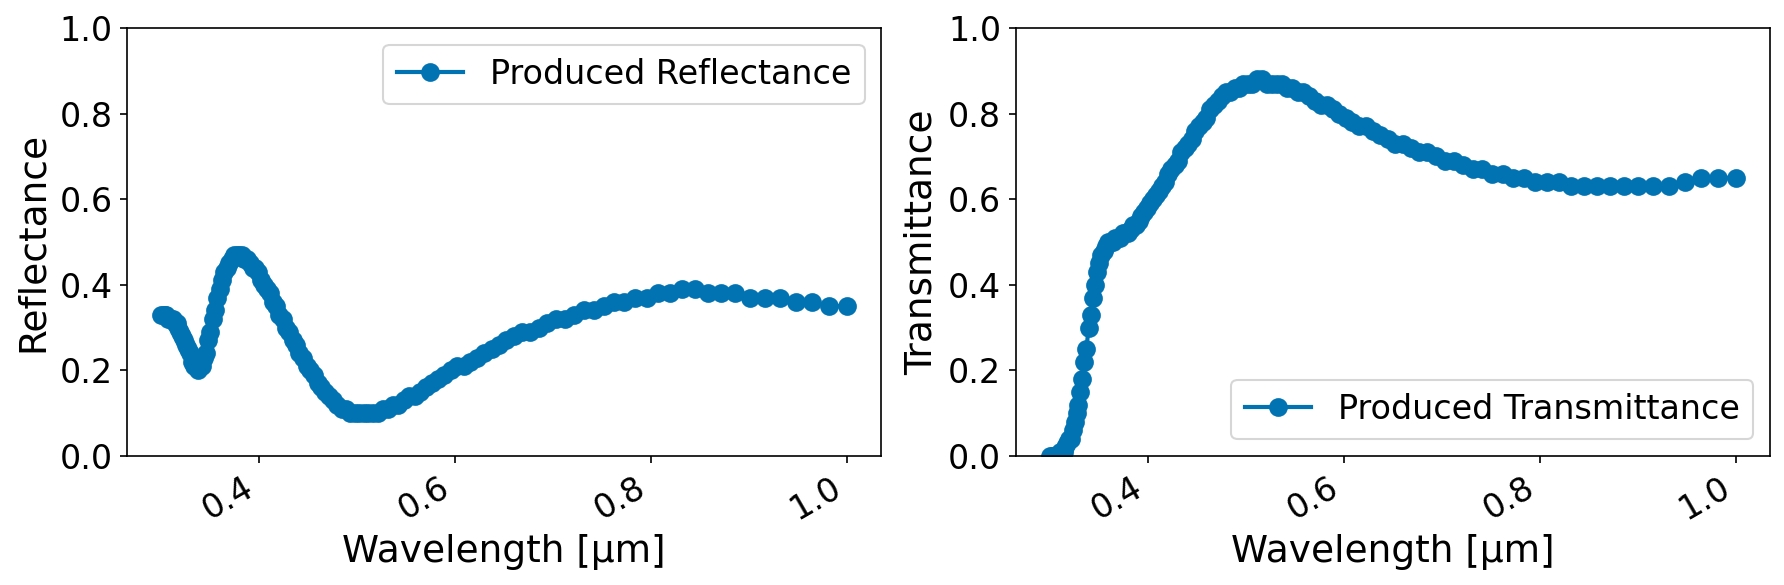

In [36]:
nidn.plot_spectrum(cfg,R,T)

In [ ]:
print("R = [")
[print(f"{r.item():.8f}",end=",") for r in R]
print("]")
print("T = [")
[print(f"{t.item():.8f}",end=",") for t in T]
print("]")

R = [


AttributeError: ignored

**2.Classification problem based on previous calculation.**


In [37]:
cfg.pop("model",None); # Forget the old model
cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.N_layers = 1 # Choose number of layers

cfg.type = "classification" # Choose type as described above
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [38]:
cfg.TRCWA_BOTTOM_LAYER_EPS = 3.76

cfg.PER_LAYER_THICKNESS = [0.08]
cfg.use_gpu = True

In [39]:
cfg.target_reflectance_spectrum =   R
cfg.target_transmittance_spectrum = T

In [41]:
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 1              |seed                   : 100            |
model_type             : siren          |iterations             : 1000           |learning_rate          : 8e-05          |
type                   : classification |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : -100.0         |real_max_eps           : 100.0          |imag_min_eps           : 0.0            |
imag_max_eps           : 3.0            |solver                 : TRCWA          |Nx                     : 1              |
Ny      

TypeError: unsupported format string passed to Siren.__format__

In [42]:
nidn.run_training(cfg);

14:28:06|NIDN-INFO| ###  New Best=0.0511 with SpectrumLoss=0.0473 ### L1=0.0473
14:28:06|NIDN-INFO| It=0     Loss=0.0511   |  weighted_avg=0.0511  |  SpectrumLoss=0.0473 | L1=0.0473
14:28:09|NIDN-INFO| It=5     Loss=0.0574   |  weighted_avg=0.0604  |  SpectrumLoss=0.0524 | L1=0.0524
14:28:11|NIDN-INFO| It=10    Loss=0.0538   |  weighted_avg=0.0572  |  SpectrumLoss=0.0494 | L1=0.0494
14:28:14|NIDN-INFO| It=15    Loss=0.0525   |  weighted_avg=0.0559  |  SpectrumLoss=0.0491 | L1=0.0491
14:28:17|NIDN-INFO| It=20    Loss=0.0515   |  weighted_avg=0.0551  |  SpectrumLoss=0.0479 | L1=0.0479
14:28:20|NIDN-INFO| It=25    Loss=0.0518   |  weighted_avg=0.0525  |  SpectrumLoss=0.0477 | L1=0.0477
14:28:23|NIDN-INFO| It=30    Loss=0.0512   |  weighted_avg=0.0520  |  SpectrumLoss=0.0474 | L1=0.0474
14:28:25|NIDN-INFO| ###  New Best=0.0511 with SpectrumLoss=0.0473 ### L1=0.0473
14:28:26|NIDN-INFO| It=35    Loss=0.0513   |  weighted_avg=0.0516  |  SpectrumLoss=0.0476 | L1=0.0476
14:28:28|NIDN-INFO| It=4

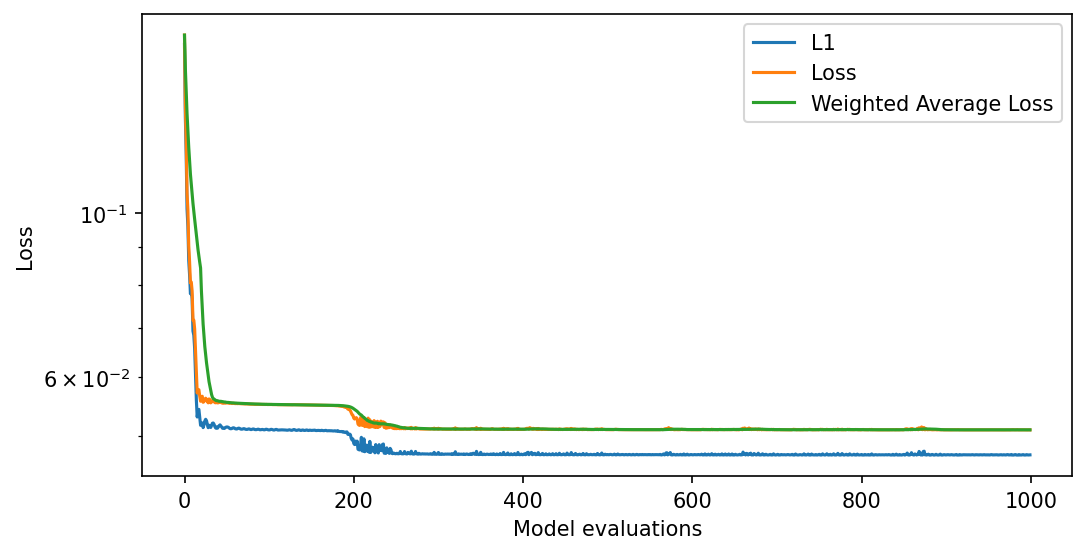

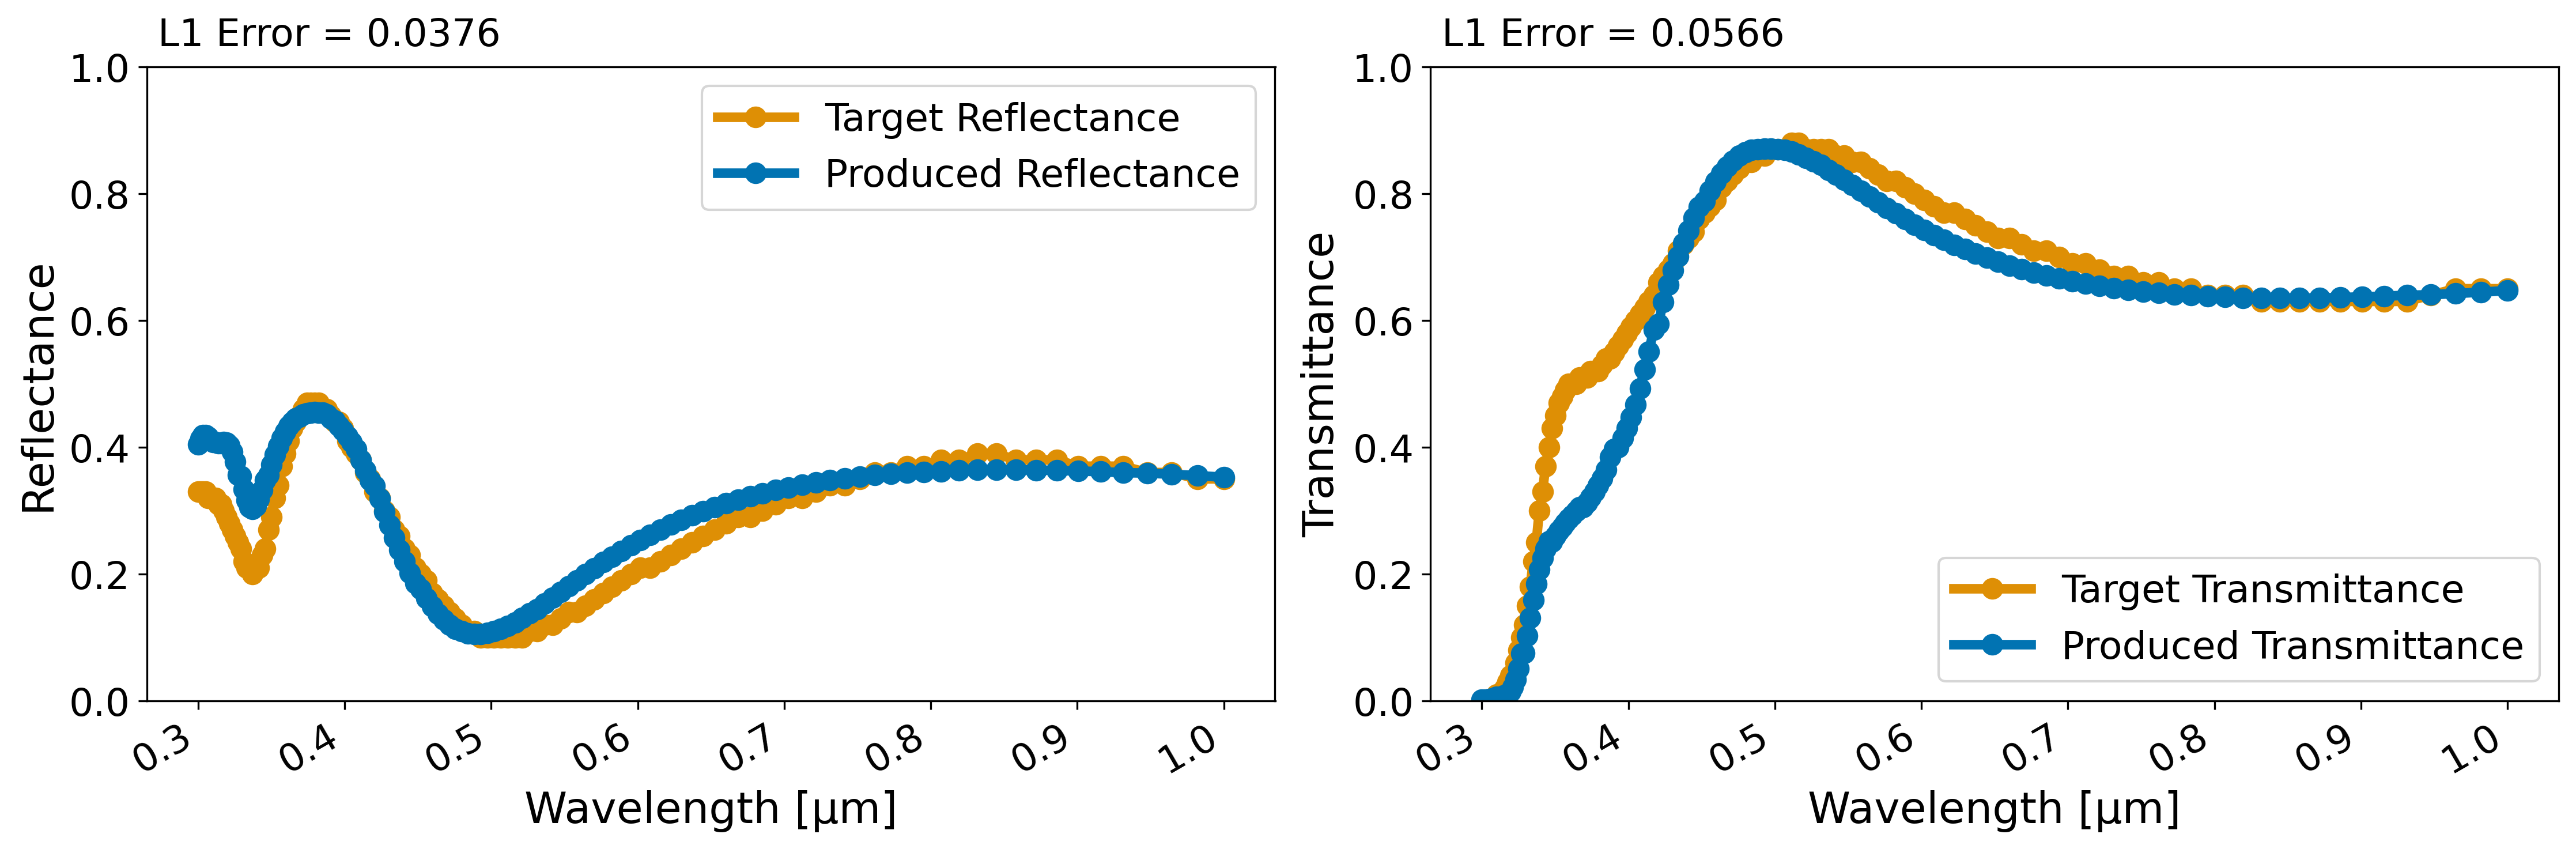

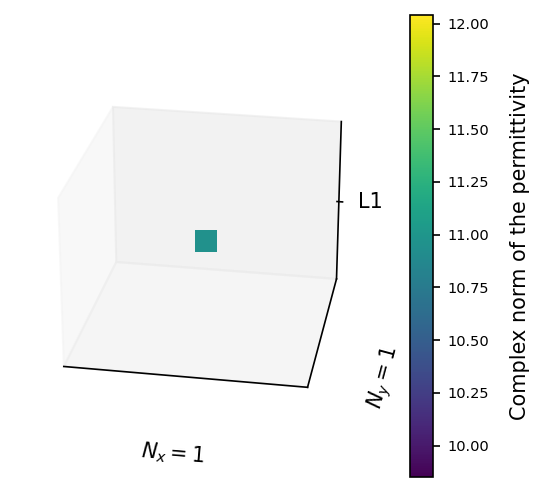

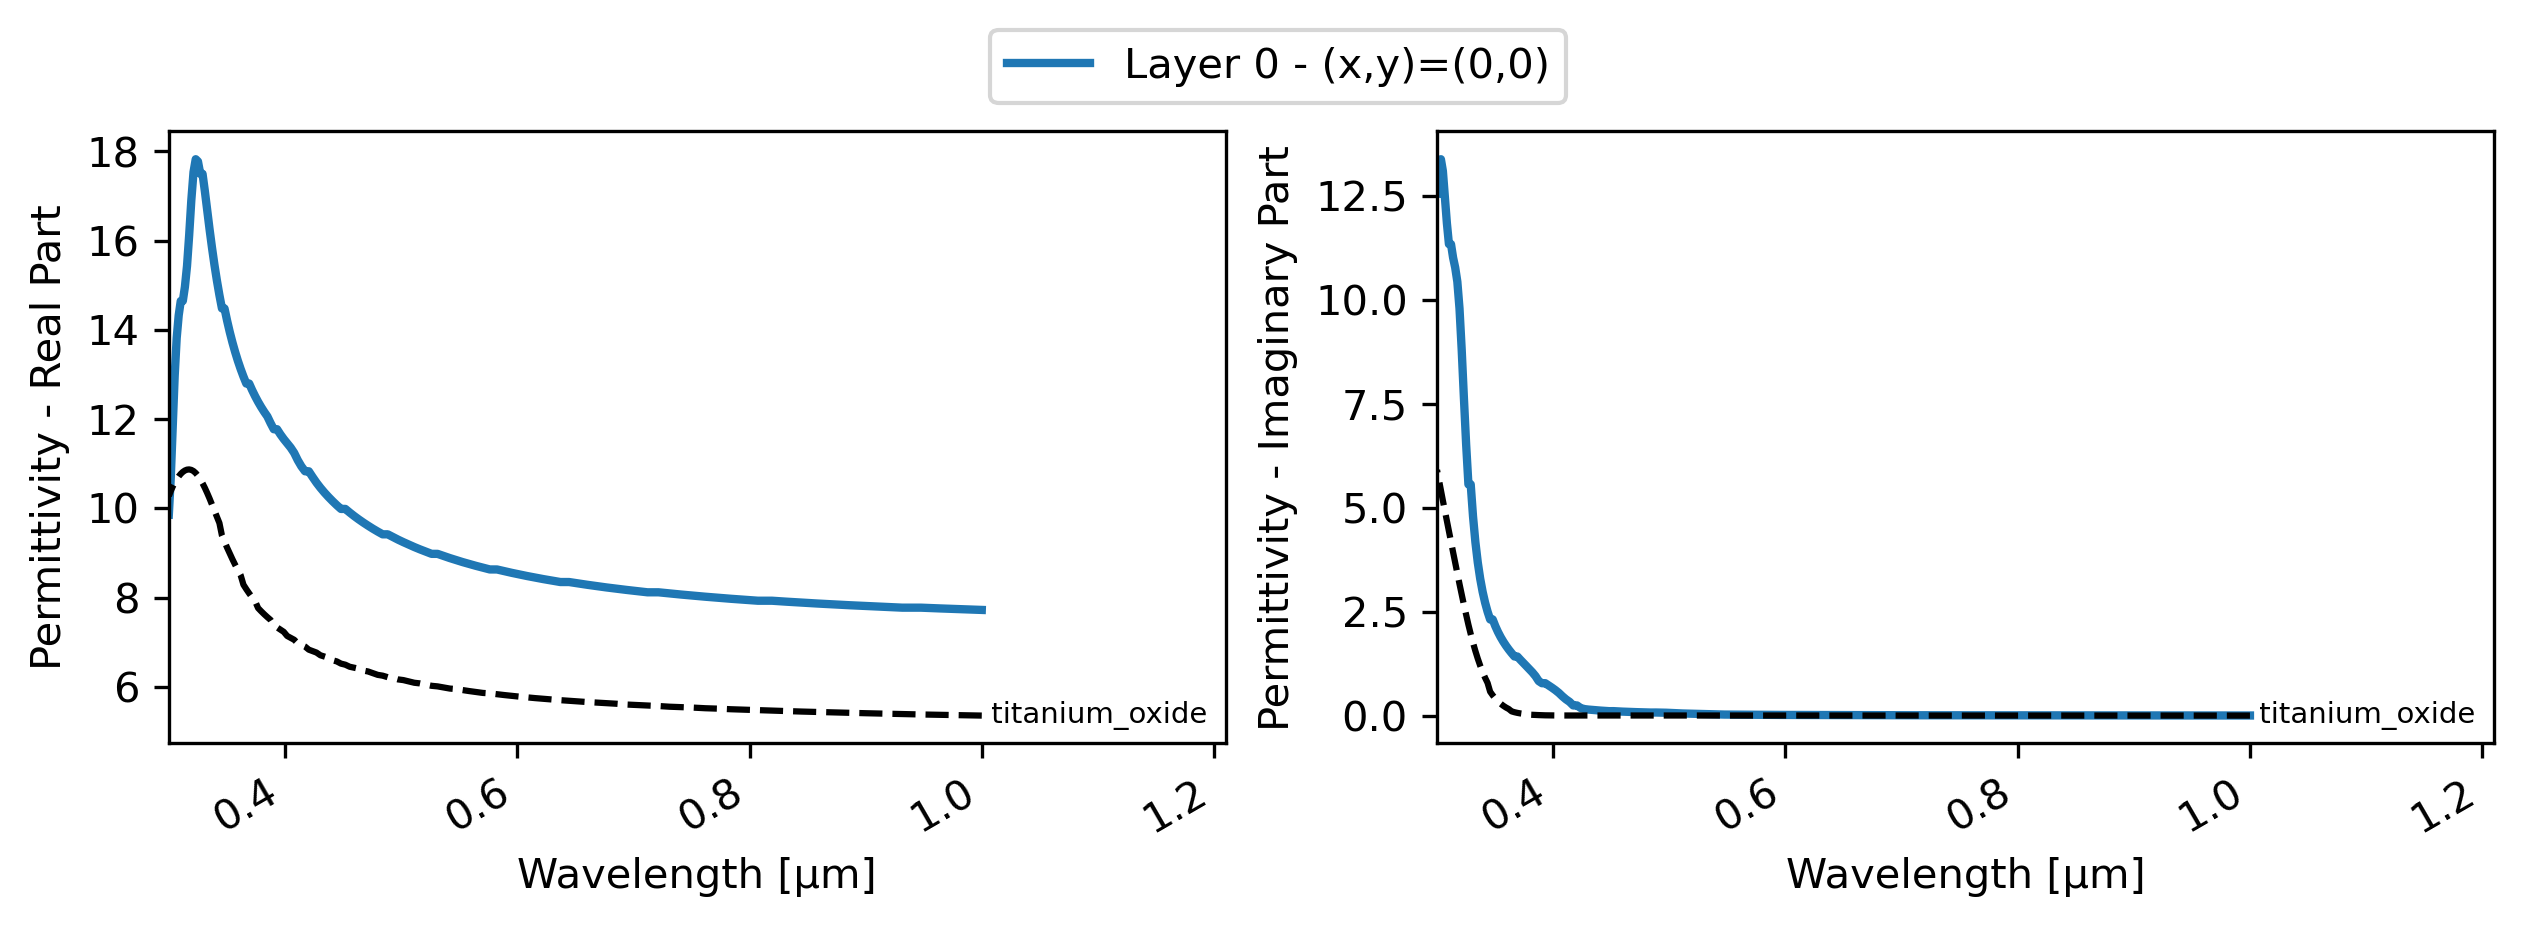

In [21]:
nidn.plot_losses(cfg)
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide"])

**3. Regression problem**

In [22]:
cfg.pop("model",None); # Forget the old model
cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.N_layers = 1 # Choose number of layers
cfg.real_min_eps = 0.0
cfg.real_max_eps = 40.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 30.0


cfg.type = "regression" # Choose type as described above
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [23]:
cfg.TRCWA_BOTTOM_LAYER_EPS = 3.76

cfg.PER_LAYER_THICKNESS = [0.08]

In [24]:
cfg.target_reflectance_spectrum =   R
cfg.target_transmittance_spectrum = T

In [25]:
nidn.run_training(cfg);

11:39:29|NIDN-INFO| ###  New Best=0.3597 with SpectrumLoss=0.3597 ### L1=0.3597
11:39:29|NIDN-INFO| It=0     Loss=0.3597   |  weighted_avg=0.3597  |  SpectrumLoss=0.3597 | L1=0.3597
11:39:29|NIDN-INFO| ###  New Best=0.3308 with SpectrumLoss=0.3308 ### L1=0.3308
11:39:29|NIDN-INFO| ###  New Best=0.3119 with SpectrumLoss=0.3119 ### L1=0.3119
11:39:30|NIDN-INFO| ###  New Best=0.2945 with SpectrumLoss=0.2945 ### L1=0.2945
11:39:30|NIDN-INFO| ###  New Best=0.2737 with SpectrumLoss=0.2737 ### L1=0.2737
11:39:30|NIDN-INFO| ###  New Best=0.2501 with SpectrumLoss=0.2501 ### L1=0.2501
11:39:30|NIDN-INFO| It=5     Loss=0.2501   |  weighted_avg=0.3035  |  SpectrumLoss=0.2501 | L1=0.2501
11:39:30|NIDN-INFO| ###  New Best=0.2259 with SpectrumLoss=0.2259 ### L1=0.2259
11:39:31|NIDN-INFO| ###  New Best=0.2029 with SpectrumLoss=0.2029 ### L1=0.2029
11:39:31|NIDN-INFO| ###  New Best=0.1820 with SpectrumLoss=0.1820 ### L1=0.1820
11:39:31|NIDN-INFO| ###  New Best=0.1676 with SpectrumLoss=0.1676 ### L1=0.1

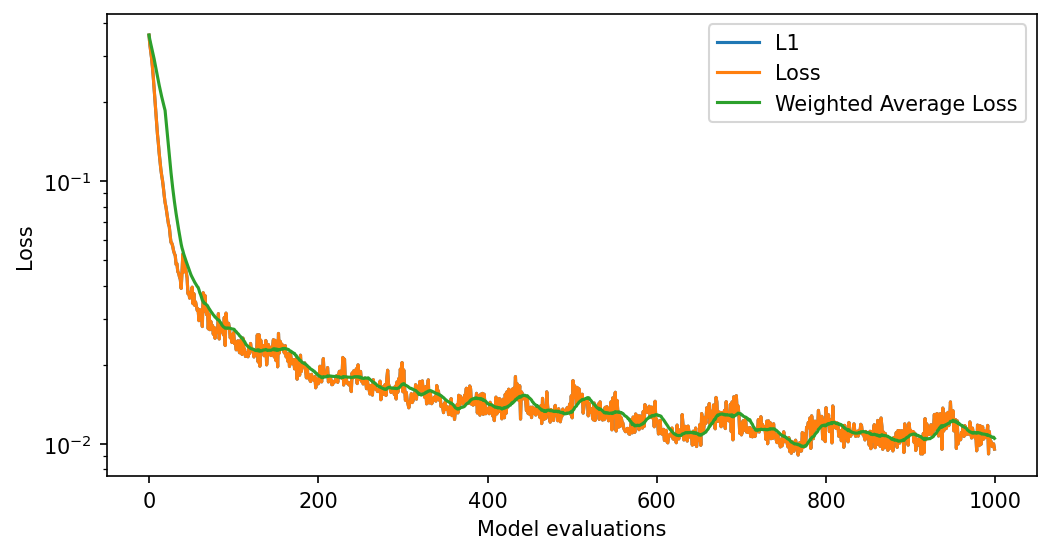

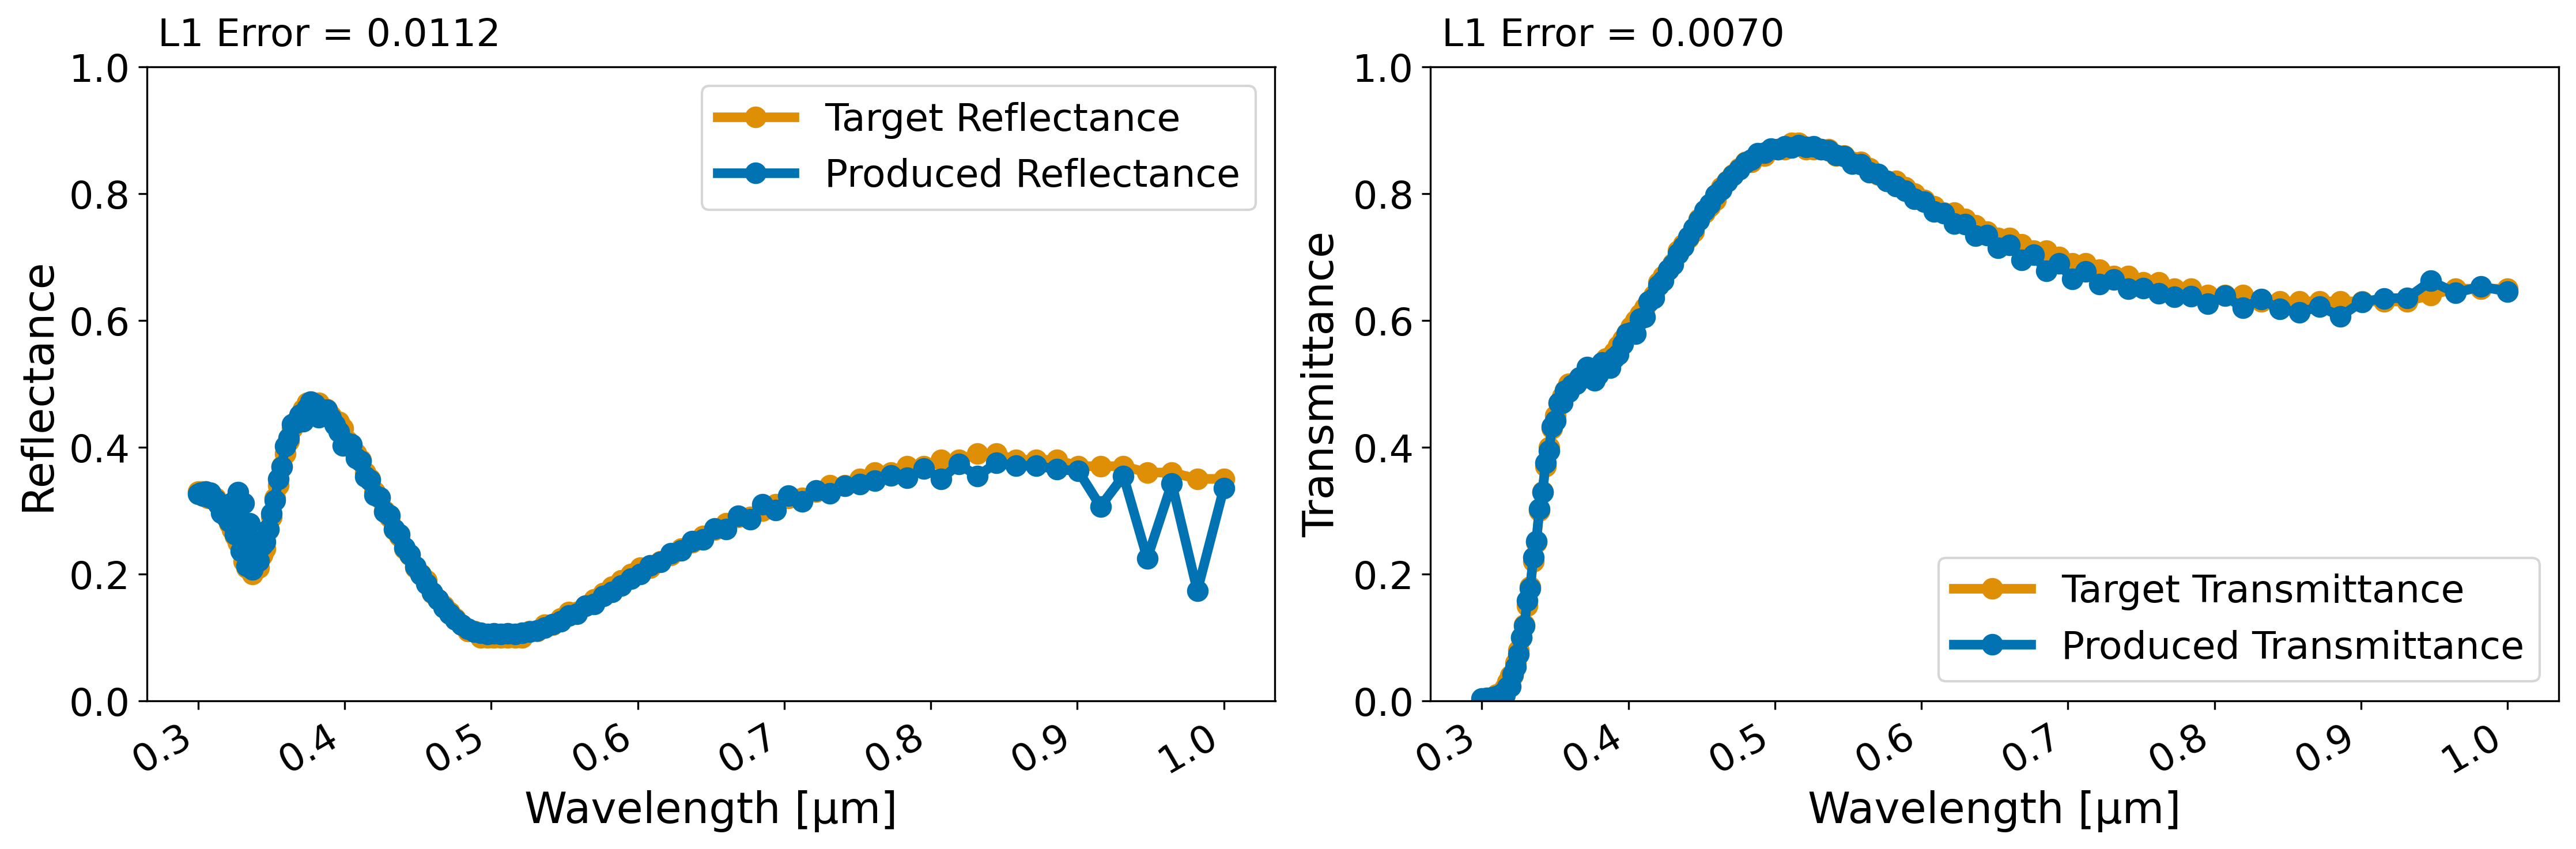

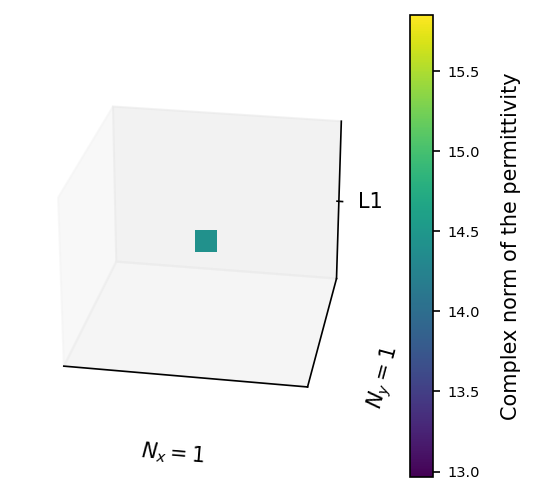

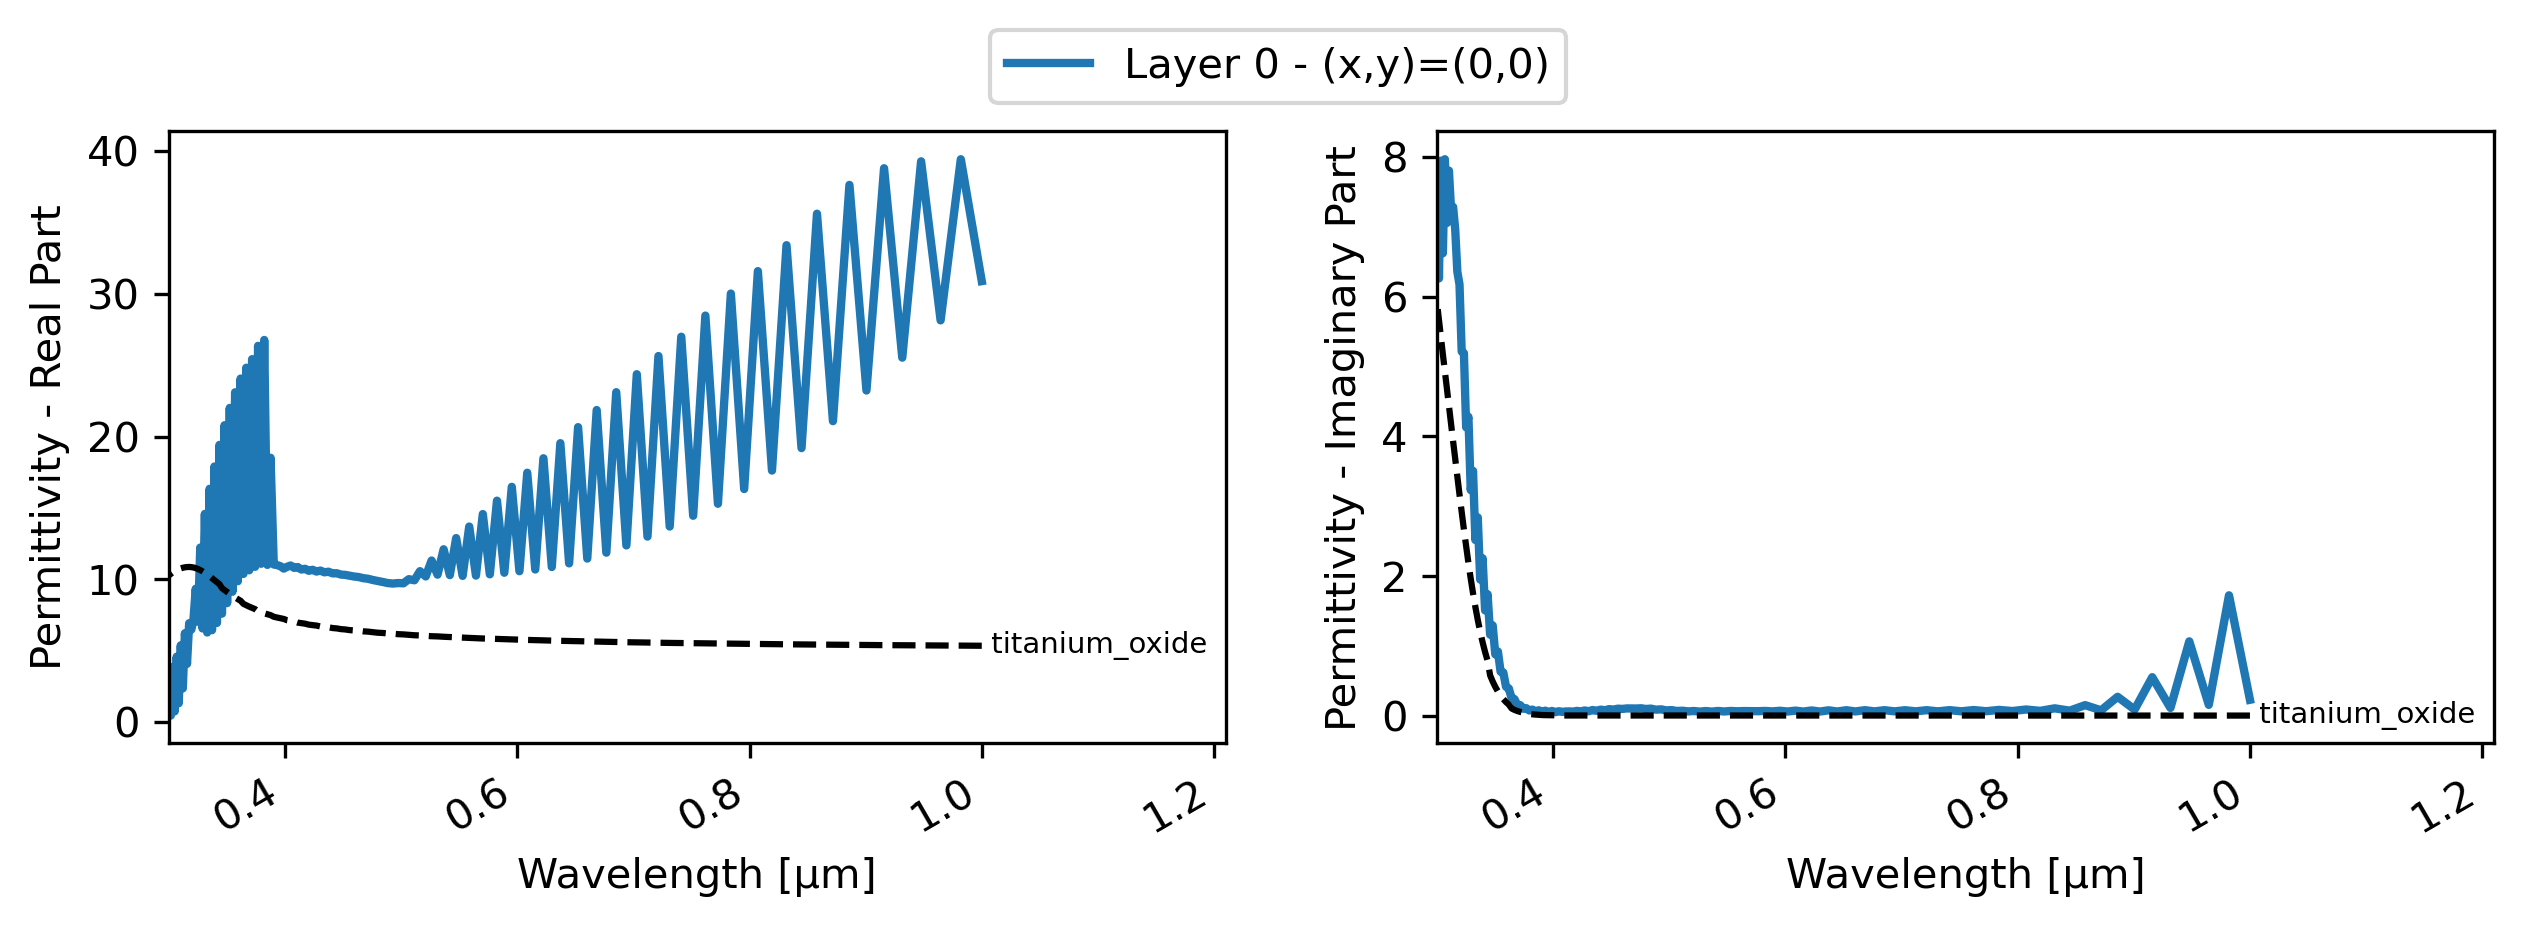

In [26]:
nidn.plot_losses(cfg)
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide"])

In [27]:
import numpy as np

def calculate_refractive_index(wavelengths, real_part, imaginary_part):
    speed_of_light = 299792458  # m/s

    frequencies = speed_of_light / (wavelengths * 1e-9)  # Convert wavelength from nm to m

    delta_wavelength = np.diff(wavelengths)[0]  # Assume evenly spaced wavelength data
    delta_frequency = speed_of_light / (wavelengths[0] * 1e-9) * (1 - 1 / (len(wavelengths) + 1))

    integrals = np.cumsum(imaginary_part * delta_wavelength)
    integrals -= (0.5 * imaginary_part[0] * delta_wavelength)
    integrals *= (2 / np.pi)

    real_part_kk = real_part[0] + (2 / np.pi) * integrals

    refractive_index = np.sqrt(1 + (real_part_kk / (2 * np.pi * frequencies))**2)

    return refractive_index

# Example usage
wavelengths = np.array([400, 500, 600])  # Wavelengths in nm
real_part = np.array([2.5, 3.0, 2.8])
imaginary_part = np.array([0.1, 0.2, 0.05])

refractive_index = calculate_refractive_index(wavelengths, real_part, imaginary_part)
print(refractive_index)


[1. 1. 1.]
